In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# os.getcwd()
# os.chdir('/Users/fionachow/Documents/NYU/CDS/Spring 2023/1017 - Responsible Data Science/Project/algaebloom/data')

In [16]:
satellite_data = pd.read_csv('./sat.csv')
elevation_data = pd.read_csv('./elevation_dem.csv')

In [6]:
satellite_data.describe()

,prop_lake_500,r_500,g_500,b_500,prop_lake_1000,r_1000,g_1000,b_1000,prop_lake_2500,r_2500,g_2500,b_2500
count,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000
mean,0.291860,128.186468,118.186496,90.797906,0.273842,132.651309,120.987224,93.590110,0.255629,135.830224,122.344628,95.336929
std,0.184878,56.880383,48.595939,48.111461,0.176043,53.732413,45.918708,46.179445,0.160341,50.024667,42.884688,43.941418
min,0.001277,1.000000,1.000000,1.000000,0.000335,1.000000,1.000000,1.000000,0.000042,1.000000,1.000000,1.000000
25%,0.146154,84.334898,85.383862,56.983360,0.140635,90.426307,88.539080,60.687841,0.137606,98.934404,94.342031,65.641969
50%,0.257959,123.855156,111.767442,81.297004,0.233766,131.699970,115.959786,84.940215,0.217252,136.133842,119.375113,88.279942
75%,0.409261,171.143348,145.612996,111.635373,0.375878,173.576494,148.949142,116.391888,0.344484,171.698004,147.204473,115.580552
max,1.000000,255.000000,255.000000,255.000000,1.000000,255.000000,255.000000,255.000000,1.000000,255.000000,255.000000,255.000000


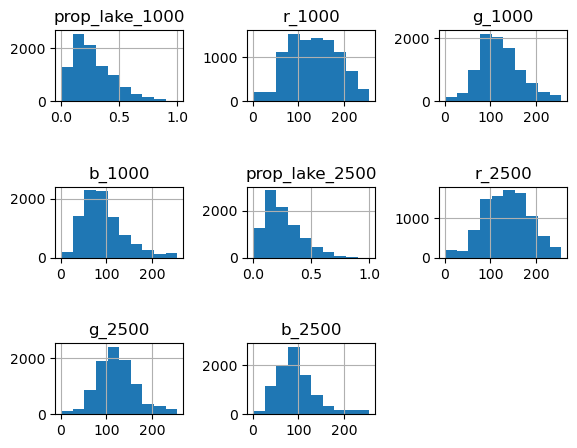

In [7]:
#plotting value distributions of input features for satellite data
satellite_data_input_features = satellite_data.drop(columns = ['prop_lake_500','r_500','g_500','b_500'])
satellite_data_input_features.hist()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=1.2)

In [8]:
satellite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353 entries, 0 to 9352
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imtype          9353 non-null   object 
 1   prop_lake_500   9353 non-null   float64
 2   r_500           9353 non-null   float64
 3   g_500           9353 non-null   float64
 4   b_500           9353 non-null   float64
 5   prop_lake_1000  9353 non-null   float64
 6   r_1000          9353 non-null   float64
 7   g_1000          9353 non-null   float64
 8   b_1000          9353 non-null   float64
 9   prop_lake_2500  9353 non-null   float64
 10  r_2500          9353 non-null   float64
 11  g_2500          9353 non-null   float64
 12  b_2500          9353 non-null   float64
 13  uid             9353 non-null   object 
 14  DateTime        9353 non-null   object 
dtypes: float64(12), object(3)
memory usage: 1.1+ MB


In [9]:
satellite_data.head()

,imtype,prop_lake_500,r_500,g_500,b_500,prop_lake_1000,r_1000,g_1000,b_1000,prop_lake_2500,r_2500,g_2500,b_2500,uid,DateTime
0,land_sat,0.121242,187.752066,183.851240,161.462810,0.069314,185.934307,182.930657,160.817518,0.028575,166.559885,164.792208,145.976912,aabm,2022-12-28 15:29:11.359087+00:00
1,sentinel,0.268989,162.790517,123.633758,84.705945,0.245098,155.874804,120.173824,83.218529,0.275378,154.154273,123.138319,81.460558,aabn,2022-12-28 15:29:17.329306+00:00
2,sentinel,0.137996,136.555328,120.121585,94.683743,0.087424,167.504627,155.254219,135.638269,0.160221,158.483822,143.132806,120.706959,aacd,2022-12-28 15:29:22.858306+00:00
3,sentinel,0.298827,239.129624,197.537794,156.581859,0.197971,229.735649,188.723331,146.595467,0.102113,205.936458,168.080443,128.281072,aaff,2022-12-28 15:29:29.460306+00:00
4,sentinel,0.442114,228.552106,234.636585,230.343681,0.349125,238.247501,242.393052,239.020702,0.252126,243.033961,245.751794,243.296854,aafl,2022-12-28 15:32:00.510235+00:00


/var/folders/hb/l21bg8lx3tgc5ky3s56cwdth0000gn/T/ipykernel_54928/3454783961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sat_correlation = satellite_data_input_features.corr()


<Axes: >

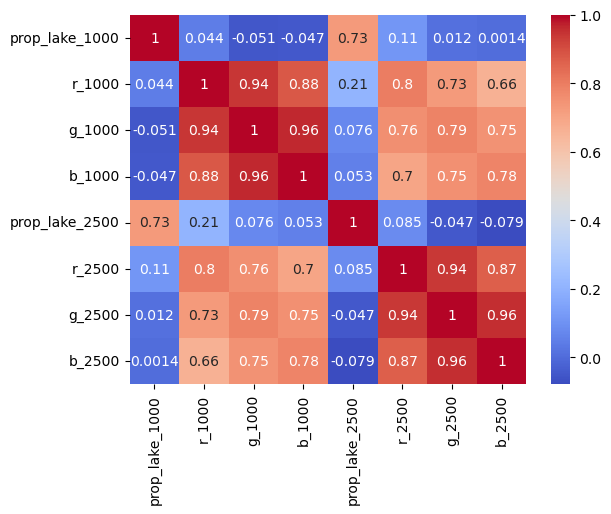

In [43]:
sat_correlation = satellite_data_input_features.corr()
sns.heatmap(sat_correlation, annot=True, cmap='coolwarm')

In [15]:
#finding missing values by filtering for -1 values as he documented using .fillna(-1) for missing satelite data
satellite_data[(satellite_data==-1).any(axis=1)]

,imtype,prop_lake_500,r_500,g_500,b_500,prop_lake_1000,r_1000,g_1000,b_1000,prop_lake_2500,r_2500,g_2500,b_2500,uid,DateTime


In [17]:
elevation_data.describe()

,latitude,longitude,box,elevation,mine,maxe,dife,avge,stde
count,23570.000000,23570.000000,23570.0,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000
mean,37.599112,-91.438307,1000.0,175.416188,159.612456,218.089806,58.477350,182.174718,11.890973
std,2.823860,17.886877,0.0,273.668598,269.082678,296.131317,55.980386,278.927905,13.567918
min,26.389430,-124.179200,1000.0,-6.573961,-8.489909,0.000000,0.000000,-5.039981,0.000000
25%,35.700925,-109.370945,1000.0,56.113747,45.532188,97.374672,23.930344,65.147533,4.125027
50%,36.228150,-79.268000,1000.0,124.059055,98.498672,162.546829,51.229195,127.206436,9.250443
75%,38.930270,-79.026108,1000.0,180.500000,173.500000,229.550110,68.817337,184.266804,13.593365
max,48.973250,-67.698650,1000.0,3547.000000,3365.940430,3988.470703,1078.071045,3618.695068,213.942810


In [18]:
elevation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23570 entries, 0 to 23569
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   23570 non-null  float64
 1   longitude  23570 non-null  float64
 2   box        23570 non-null  int64  
 3   elevation  23570 non-null  float64
 4   mine       23570 non-null  float64
 5   maxe       23570 non-null  float64
 6   dife       23570 non-null  float64
 7   avge       23570 non-null  float64
 8   stde       23570 non-null  float64
 9   uid        23570 non-null  object 
 10  DateTime   23570 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


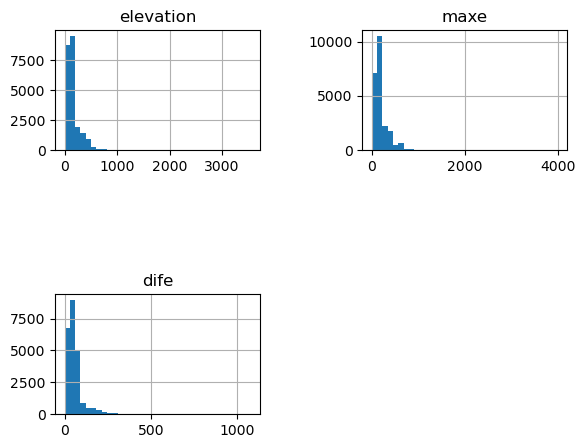

In [40]:
#plotting value distributions of input features for elevation data
elevation_data_input_features = elevation_data.drop(columns = ['latitude','longitude','box','avge','stde','mine'])
elevation_data_input_features.hist(bins=35)
plt.xlim(0, 1000)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=1.2)

/var/folders/hb/l21bg8lx3tgc5ky3s56cwdth0000gn/T/ipykernel_54928/457481036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  elevation_correlation = elevation_data_input_features.corr()


<Axes: >

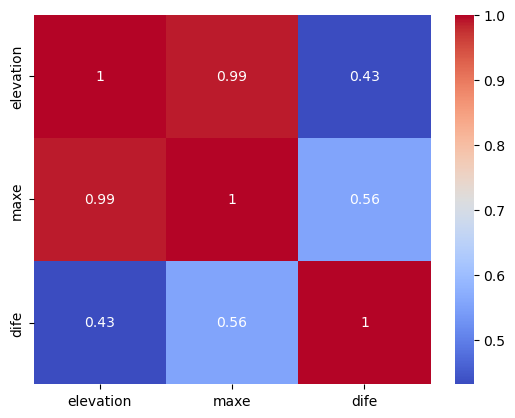

In [44]:
elevation_correlation = elevation_data_input_features.corr()
sns.heatmap(elevation_correlation,annot=True, cmap='coolwarm')


In [60]:
#finding missing values by filtering for -99999 values as he documented using dife = -99999 for missing elevation data
elevation_data_describe = elevation_data[elevation_data['dife']== -99999].any(axis=1)

elevation_data_describe.describe()

count       0
unique      0
top       NaN
freq      NaN
dtype: object